# Statistic results across all mice 
Given you have run the individual notebooks for each mouse, or if you have the statistic result csvs, you can run this notebook to reproduce the statistic plots over multiple mice presented in the manuscript associated with this repository.

In [1]:
import os 
os.chdir('..')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from scipy.stats import f_oneway

## Overall confusion matrix

In [4]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [7]:
your_path_pred_labels = ''

In [8]:
df_labels1 = pd.read_csv(your_path_pred_labels+'mouse1_test_labels.csv')
df_labels2 = pd.read_csv(your_path_pred_labels+'mouse2_test_labels.csv')
df_labels3 = pd.read_csv(your_path_pred_labels+'mouse3_test_labels.csv')

In [9]:
df_label = pd.concat([df_labels1, df_labels2, df_labels3])

In [10]:
df_label.loc[df_label['mouse'] == 2, ['true_test', 'pred_test']] += df_label[df_label['mouse'] == 1]['pred_test'].max()+1

In [11]:
df_label.loc[df_label['mouse'] == 3, ['true_test', 'pred_test']] += df_label[df_label['mouse'] == 2]['pred_test'].max()+1

In [12]:
df_label[df_label['mouse'] == 1]['true_test'].unique()

array([1, 0, 2, 3, 4, 5, 7, 6])

In [13]:
df_label[df_label['mouse'] == 2]['true_test'].unique()

array([ 8,  9, 10, 11, 12])

In [14]:
df_label[df_label['mouse'] == 3]['true_test'].unique()

array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])

In [15]:
cm = confusion_matrix(df_label['pred_test'], df_label['true_test'], normalize='true')

In [16]:
disp = ConfusionMatrixDisplay(cm,
                             display_labels=[i for i in range(1, len(df_label['true_test'].unique())+1)])

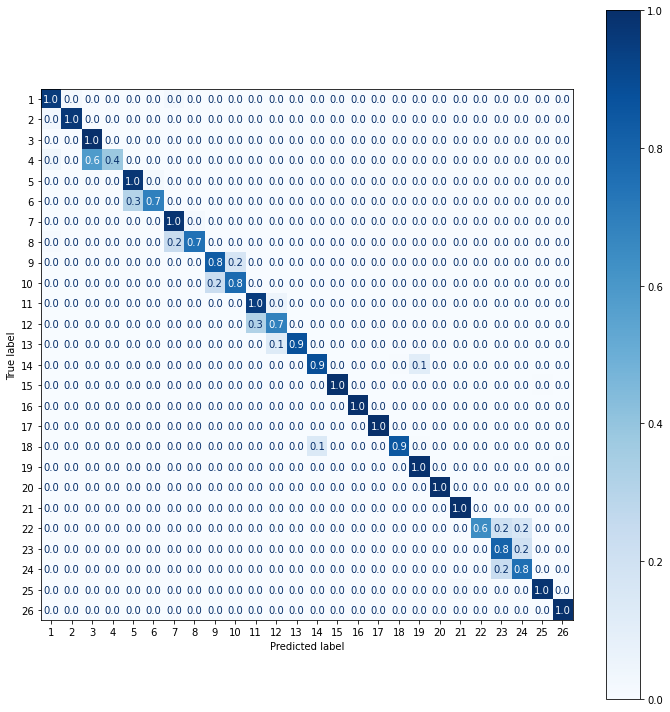

In [17]:
## Fig.5 panel c
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(cmap=plt.cm.Blues, include_values=True, ax=ax, values_format='.1f')
disp.ax_.grid(False)
#disp.ax_.set_xticklabels(disp.ax_.get_xticks(), rotation = 50)
plt.tight_layout()
#plt.savefig('')

In [18]:
report = classification_report(df_label['pred_test'],
                                              df_label['true_test'], output_dict=True)

In [19]:
for key, val in report.items():
    try:
        if int(key) in df_label['true_test'].unique():
            mouse_ = df_label[df_label['true_test'] == int(key)]['mouse'].unique()[0]
            report[key]['mouse'] = mouse_
            report[key]['accuracy'] = cm.diagonal()[int(key)]
    except:
        pass

In [20]:
df = pd.DataFrame(report).transpose()

In [36]:
#df.to_csv('classification_report.csv')

(0.0, 1.0)

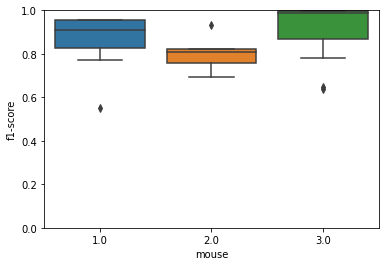

In [21]:
ax = sns.boxplot(x='mouse', y='f1-score', data=df.iloc[:26,:])
ax.set_ylim(0, 1)
#plt.savefig('')

## Overall MSE analysis

In [22]:
from itertools import combinations
from scipy import stats

In [23]:
your_path_mse = ''

In [24]:
df_mse1 = pd.read_csv(your_path_mse+'mse_mouse1.csv')
df_mse2 = pd.read_csv(your_path_mse+'mse_mouse2.csv')
df_mse3 = pd.read_csv(your_path_mse+'mse_mouse3.csv')

In [25]:
df_mse_all = pd.concat([df_mse1, df_mse2, df_mse3])

In [26]:
threshold_mouse1 = 247.3 #defined based off mean and std of mse distributions
threshold_mouse2 = 192.6
threshold_mouse3 = 435.8
threshold_mice = [threshold_mouse1, threshold_mouse2, threshold_mouse3]

In [27]:
proportion_under = []
mouse_list = []
types_list = []

for i, mouse in enumerate(df_mse_all['mouse'].unique()):
    df_mse_ = df_mse_all[df_mse_all['mouse'] == mouse]
    thresh_ = threshold_mice[i]
    for type_ in df_mse_['type'].unique():
        df_ = df_mse_[df_mse_['type'] == type_]
        proportion_under.append(np.sum(df_['mse'] <= thresh_)/len(df_))
        mouse_list.append(mouse)
        types_list.append(type_)

In [28]:
df_proportions = pd.DataFrame(proportion_under, columns=['proportion_under_thresh'])
df_proportions['mouse'] = mouse_list
df_proportions['data_type'] = types_list

In [29]:
df_proportions['proportions_over_thresh'] = 1 - df_proportions['proportion_under_thresh']

In [30]:
#df_proportions.to_csv('proportions_mse_threshold.csv')

<AxesSubplot:xlabel='data_type', ylabel='proportion_under_thresh'>

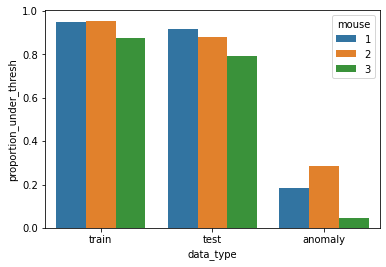

In [31]:
sns.barplot(x='data_type', y='proportion_under_thresh', data=df_proportions, hue='mouse')
#plt.savefig('proportion_under_threshold_mse_barplot.pdf')

In [32]:
df_proportions[df_proportions['data_type'] == 'train']['proportion_under_thresh'].mean(), df_proportions[df_proportions['data_type'] == 'train']['proportion_under_thresh'].std()

(0.9259783677710001, 0.0448187163296832)

In [33]:
df_proportions[df_proportions['data_type'] == 'test']['proportion_under_thresh'].mean(), df_proportions[df_proportions['data_type'] == 'test']['proportion_under_thresh'].std()

(0.8643653616443512, 0.06577751342835512)

In [34]:
df_proportions[df_proportions['data_type'] == 'anomaly']['proportions_over_thresh'].mean(), df_proportions[df_proportions['data_type'] == 'anomaly']['proportions_over_thresh'].std()

(0.8288194345246597, 0.11942109929188229)

In [51]:
#df_mse_all.to_csv('mse_all_mice.csv')

## Noise rejection for all mice

In [36]:
your_path_noise = ''

In [37]:
df_noise_ae1 = pd.read_csv(your_path_noise+'noise_rejection_levels_mouse1.csv')
df_noise_ae2 = pd.read_csv(your_path_noise+'noise_rejection_levels_mouse2.csv')
df_noise_ae3 = pd.read_csv(your_path_noise+'noise_rejection_levels_mouse3.csv')

In [38]:
df_noise_ae = pd.concat([df_noise_ae1, df_noise_ae2, df_noise_ae3])

In [40]:
df_noise_ae.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
#df_noise_ae.to_csv('')

Text(0, 0.5, '% of test considered noise ')

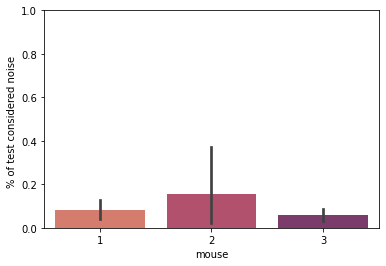

In [42]:
## Fig.5 panel f
fig, ax = plt.subplots()
sns.barplot(x='mouse', y='Percentage_noise', data=df_noise_ae, ax=ax, palette='flare')
ax.set_ylim(0, 1)
ax.set_ylabel('% of test considered noise ')
#plt.savefig('')

### Silhouette score

In [43]:
your_path_isi = ''

In [44]:
df_sil_score1 = pd.read_csv(your_path_isi+'sil_scores_data_mouse1.csv')
df_sil_score2 = pd.read_csv(your_path_isi+'sil_scores_data_mouse2.csv')
df_sil_score3 = pd.read_csv(your_path_isi+'sil_scores_data_mouse3.csv')

In [45]:
#df_sil_score1.to_csv('')

In [46]:
df_sil_score = pd.concat([df_sil_score1, df_sil_score2, df_sil_score3])

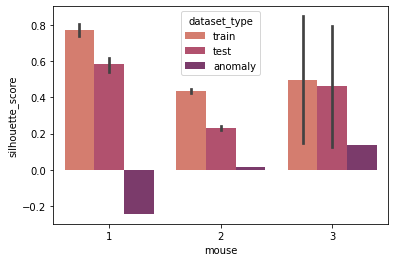

In [47]:
ax = sns.barplot(x='mouse', y='silhouette_score', data=df_sil_score, hue='dataset_type', palette='flare')
#plt.savefig('')